In [1]:
%pip install tensorflow==2.16.1

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [19]:
batch_size = 32
img_height = 128
img_width = 128

In [21]:
data_dir = "D:/justforandroid/adatelem/Train1"
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26300 files belonging to 31 classes.
Using 21040 files for training.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26300 files belonging to 31 classes.
Using 5260 files for validation.


In [24]:
class_names = train_ds.class_names
print(class_names)

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031']


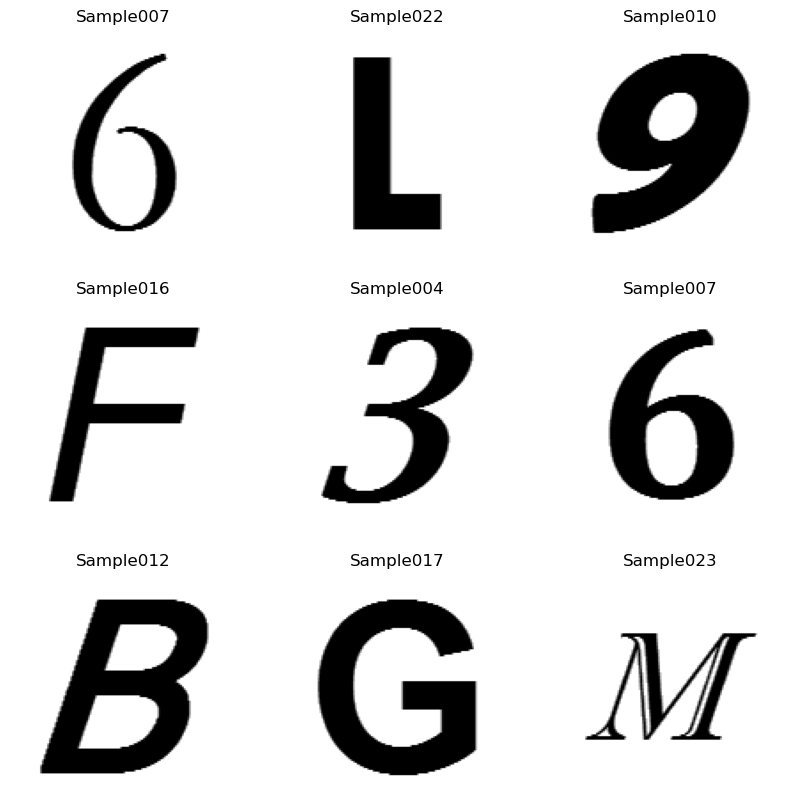

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [27]:
#https://www.tensorflow.org/tutorials/load_data/images

normalization_layer = tf.keras.layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [29]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [30]:
num_classes = 31

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [32]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [33]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.7282 - loss: 1.0415 - val_accuracy: 0.9576 - val_loss: 0.1446
Epoch 2/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - accuracy: 0.9585 - loss: 0.1286 - val_accuracy: 0.9624 - val_loss: 0.1122
Epoch 3/3
658/658 ━━━━━━━━━━━━━━━━━━━━ 73s 112ms/step - accuracy: 0.9782 - loss: 0.0665 - val_accuracy: 0.9684 - val_loss: 0.0936


Using tf.data for finer control - eddig van meg>>
Holnap>> D:\Egyetemi programozás\5. félév\lua\GyakorlatokXhet\vitmav45\06\Keras_MNIST_CNN.ipynb
https://www.tensorflow.org/tutorials/images/classification
